<a href="https://colab.research.google.com/github/irajamuller/quantum_computing/blob/main/Circuito_Qu%C3%A2ntico_2_qubits%2C_Operador_Densidade_e_Esfera_de_Bloch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc --quiet
!pip install qutip --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 51.5 MB/s eta 0:00:00


In [28]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qutip import Bloch

import numpy as np

# Circuito Quântico de 2 qubits

In [3]:
# Portas quânticas (operações unitárias)
I = np.array([ [1, 0], [0, 1] ])
X = np.array([ [0, 1], [1, 0] ])
H = np.array([ [1, 1], [1, -1] ]) * 1/np.sqrt(2)

In [14]:
# Estado 2 qubits em |00>
ket0 = np.array([ [1], [0] ])
ket1 = np.array([ [0], [1] ])
psi = np.kron(ket0, ket0)
array_to_latex(psi)

<IPython.core.display.Latex object>

In [11]:
# Aplicando porta X no primeiro qubit e identidade no segundo qubit
psi1 = np.kron(X, I) @ psi
array_to_latex(psi1)

<IPython.core.display.Latex object>

In [13]:
# Aplicando porta X no primeiro qubit e hadamard no segundo qubit
psi2 = np.kron(X, H) @ psi1
array_to_latex(psi2)

<IPython.core.display.Latex object>

# Porta CNOT

In [18]:
CNOT = np.kron(ket0 @ ket0.conj().T, I)
CNOT = CNOT + np.kron(ket1 @ ket1.conj().T, X)
array_to_latex(CNOT)

<IPython.core.display.Latex object>

In [22]:
# Aplicando a CNOT em dois qubits |10>
psi10 = np.kron(ket1, ket0)
array_to_latex(CNOT @ psi10)

<IPython.core.display.Latex object>

In [23]:
# Aplicando a CNOT em dois qubits |11>
psi11 = np.kron(ket1, ket1)
array_to_latex(CNOT @ psi11)

<IPython.core.display.Latex object>

# Medição

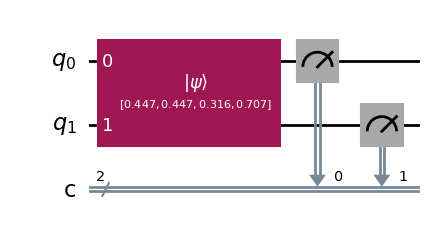

In [25]:
qc = QuantumCircuit(2, 2)
qc.initialize([ np.sqrt(0.2), np.sqrt(0.2), np.sqrt(0.1), np.sqrt(0.5) ], [0, 1])
qc.measure([0, 1], [0, 1])
qc.draw('mpl')